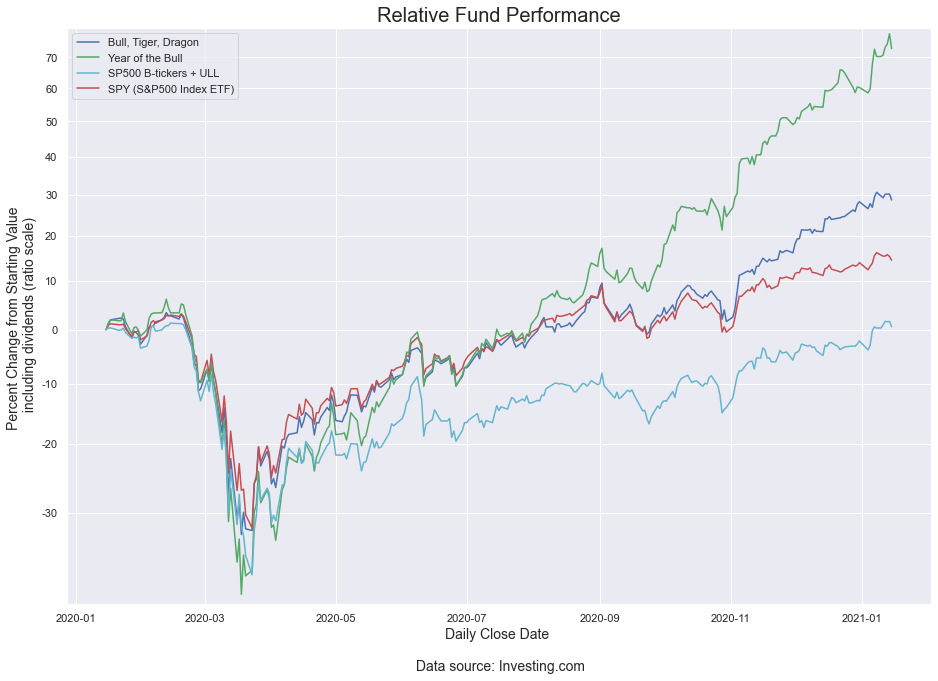

In [1]:
%matplotlib inline
import seaborn as sns 
sns.set(style="darkgrid")
import sys
sys.path.insert(0,'C:\\Users\\mattn\\Documents\PythonScripts')
from FundIncubator import FundIncubator

# Stocks founded in year of Ox, Tiger, or Dragon
astro1 = ['DIS', 'BMO', 'WMT', 'NKE', 'AAPL', 'BX', 'WDC', 'NFLX', 'GOOG',
          'VFC', 'BIDU', 'YUM', 'ILMN', 'SYNA', 'QCOM']#, 'UBER', 'PINS']

# Stocks founded in year of Ox (Bull)
bull = ['DIS', 'BX', 'NFLX', 'BKNG', 'URI', 'DFS', 'SPWR', 'PNW', 'DECK',
        'YUM', 'QCOM', 'EWBC', 'AVGO', 'JBHT']#, 'UBER', 'PINS']

#dates are dd/mm/yyy
irrat = FundIncubator(sdate='15/1/2020', edate='15/1/2021', dwm='Daily', tickers=astro1)
fig = irrat.generatePlot('Bull, Tiger, Dragon', yticks=10)#, ytick_min=-50)

fig = irrat.YFaddStock('UBER', 'Bull, Tiger, Dragon')

fig = irrat.addFund(bull, 'Year of the Bull', 'g')
fig = irrat.YFaddStock('UBER', 'Year of the Bull') 
fig = irrat.YFaddStock('PINS', 'Year of the Bull')
fig = irrat.changeYlims(ymax_label=80)

sp_Bs = ['BKR','BLL','BAC','BK','BAX','BDX','BBY','BIO','BIIB','BLK','BA',
         'BKNG','BWA','BXP','BSX','BMY','BR','BEN','LUV','ALL','WELL']
fig = irrat.addFund(sp_Bs, 'SP500 B-tickers + ULL', 'c')

axes_list = fig.get_axes()
ax = axes_list[0]
[leg_handles, leg_labels] = ax.get_legend_handles_labels()
leg_labels.append(leg_labels.pop(1))  #move SPY to end
leg_handles.append(leg_handles.pop(1))
legend = ax.legend(leg_handles, leg_labels)

These three initial funds went "live" on Nov 27th, 2020; that is, the stocks composing the funds were finalized at that time.  In order to show more interesting data, the chart begins one year earlier, on Nov 27th 2019.  Showing the performance in retrospect in this manner introduces another form of survivorship bias because stock selection occurs only on the stocks that have performed well in retrospect as well as neglecting those that have gone out of business.  Only the performance going forward as of Nov 2020 is of consequence; however, past performance is nice to look at.  In future updates the historical data will be gradually dropped from the chart until reaching Nov 27th 2020.  

The stock tickers in the funds are

In [3]:
def listFund(fund, fundName):
    print(f'{fundName:21} = ', end='')
    for ticker in fund[0:-1]:print(ticker + ", ", end='')
    print(fund[-1])
    
listFund(astro1 + ['UBER'], 'Bull, Tiger, Dragon')
listFund(bull + ['UBER', 'PINS'], 'Year of the Bull')
listFund(sp_Bs, "SP500 B-tickers + ULL")
#listFund(mine, "My stocks")

Bull, Tiger, Dragon   = DIS, BMO, WMT, NKE, AAPL, BX, WDC, NFLX, GOOG, VFC, BIDU, YUM, ILMN, SYNA, QCOM, UBER
Year of the Bull      = DIS, BX, NFLX, BKNG, URI, DFS, SPWR, PNW, DECK, YUM, QCOM, EWBC, AVGO, JBHT, UBER, PINS
SP500 B-tickers + ULL = BKR, BLL, BAC, BK, BAX, BDX, BBY, BIO, BIIB, BLK, BA, BKNG, BWA, BXP, BSX, BMY, BR, BEN, LUV, ALL, WELL


The stocks in the "Bull, Tiger, Dragon" fund include those founded in the year of the Ox, Tiger, or Dragon, or the subsequent parent company if they were acquired:
- DIS - Disney, owner of 20th Century Fox founded 1949 (Bull)
- BMO - BMO financial group, owner of Diner's Club founded 1950 (Tiger)
- VFC = VF Corporation, owner of Eastpak founded 1952 (Dragon)
- WMT - Walmart, 1962 (Tiger)
- NKE - Nike, 1964 (Dragon)
- AAPL - Apple, 1976 (Dragon)
- BX - Blackstone Group, 1985 (Bull)
- QCOM - Qualcomm, 1985
- SYNA - Synaptics, 1986 (Tiger)
- WDC - Western Digital, owner of SanDisk founded 1988 (Dragon)
- NFLX - Netflix, 1997 (Bull)
- YUM - YUM! Brands, 1997
- GOOG - Google, 1998 (Tiger)
- ILMN - Illumina, 1998
- BIDU - Baidu, 2000 (Dragon)
- UBER - Uber Technologies, 2009

This being the stock market, it makes sense to also have a fund that is purely composed of companies founded in the year of the Bull (also known as the Ox, but as mentioned, we are talking the stock market here....).  Year of the Bull stocks:

- DIS - Disney, owner of 20th Century Fox founded 1949
- AVGO - Broadcom, 1961
- JBHT - J.B. Hunt Transport Services, 1961
- DECK - Deckers Outdoor Corporation, 1973
- EWBC - East West Bancorp, 1973
- BX - Blackstone Group, 1985
- QCOM - Qualcomm, 1985
- DFS - Discover Financial Services, 1985
- SPWR - SunPower, 1985
- PNW - Pinnacle West Capital Corporation, 1985
- NFLX - Netflix, 1997
- YUM - YUM! Brands, 1997
- BKNG - Booking Holdings, owner of Priceline.com founded 1997
- URI - United Rentals, 1997
- UBER - Uber Technologies, 2009
- PINS - Pinterest, 2009

Notes:  The vertical axis in the plot above shows the percent change from the starting value with dividends accrued but not reinvested and an initial purchase of the same amount in dollars for each stock.  All stocks are held for the duration and none added.  While not normal for a mutual fund it does partially implement the useful addage "ride your winners and sell your losers" since over time the winners will tend to dominate fund performance and the losers eventually become irrelevant.  The scale shown is a ratio scale, so changes of say 100% early in the chart display the same as changes of 100% later, even in the case where the fund value has increased signifcantly.  Using this scale avoids reinforcing another common blindspot, that of over-emphasizing recent information.  Performance of the S&P 500, including dividends, is shown for baseline comparison.